# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 851 kB/s eta 0:00:01:00:13
     |████████████████████████████████| 19.3 MB 63.7 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 5.3 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 37.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 71.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 35.9 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 29.4 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 53.5 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.5 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=1b102585413c7c664d3df5bac11f51e0ddc7845b5ae067fba008f1e831e720a3
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


In [5]:
!pip install ipywidgets


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 840 kB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 77.4 MB/s eta 0:00:01


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# I cant download mnist through datasets.MNIST. It showed error Forbidden (403). This code and code below it fixed the error.
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz

--2024-07-09 05:53:51--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2024-07-09 05:53:52--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz.2’

MNIST.tar.gz.2          [              <=>   ]  33.20M  12.0MB/s    in 2.8s    

2024-07-09 05:53:55 (12.0 MB/s) - ‘MNIST.tar.gz.2’ saved [34813078]



In [5]:
!tar -zxvf MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [7]:
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose(
    [transforms.ToTensor()]
)

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = torchvision.datasets.MNIST(root="./", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
testing_data = torchvision.datasets.MNIST(root="./", train=False, download=True, transform=transform)
test_loader = DataLoader(testing_data, batch_size=32)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

2


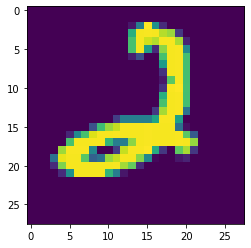

9


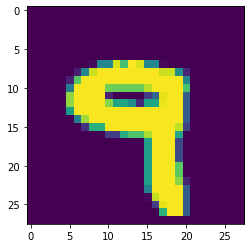

7


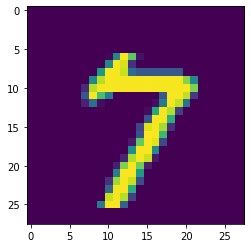

3


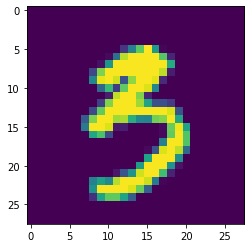

5


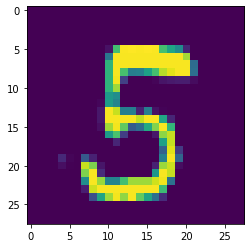

In [9]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
## YOUR CODE HERE ##
# class for neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = nn.ReLU()
        self.layer1 = nn.Linear(28 * 28 * 1, 512)
        self.layer2 = nn.Linear(512, 256)
        self.layer3 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

# instantiate model
net = Net()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
## YOUR CODE HERE ##
# optimizer
optimizer = optim.Adam(net.parameters(), lr=0.0001)
#loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [18]:
## YOUR CODE HERE ##
net.to(device)
epochs = 20

train_loss_history = list()
val_loss_history = list()

for epoch in range(epochs):
    net.train()
    train_loss = 0
    train_correct = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
         # Pass to GPU if available.
        inputs, labels = inputs.to(device), labels.to(device)
            
        optimizer.zero_grad()
        
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)
        train_correct += torch.sum(preds == labels).item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {(train_correct / len(train_loader.dataset)) * 100 :.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append((train_correct / len(train_loader.dataset)) * 100)

    # validation
    val_loss = 0.0
    val_correct = 0.0
    net.eval()
    for inputs, labels in test_loader:
         # Pass to GPU if available.    
        inputs, labels = inputs.to(device), labels.to(device)
            
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        
        _, preds = torch.max(outputs.data, 1)
        val_correct += torch.sum(preds == labels).item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {(val_correct/len(test_loader.dataset)) * 100:.2f}% validation loss: {val_loss/len(test_loader):.5f}')
    val_loss_history.append((val_correct/len(test_loader.dataset)) * 100)
        

Epoch 1 training accuracy: 100.00% training loss: 0.00009
Epoch 1 validation accuracy: 98.27% validation loss: 0.09123
Epoch 2 training accuracy: 99.92% training loss: 0.00260
Epoch 2 validation accuracy: 98.08% validation loss: 0.09539
Epoch 3 training accuracy: 99.99% training loss: 0.00052
Epoch 3 validation accuracy: 98.27% validation loss: 0.08960
Epoch 4 training accuracy: 100.00% training loss: 0.00009
Epoch 4 validation accuracy: 98.30% validation loss: 0.09083
Epoch 5 training accuracy: 100.00% training loss: 0.00006
Epoch 5 validation accuracy: 98.28% validation loss: 0.09412
Epoch 6 training accuracy: 99.91% training loss: 0.00293
Epoch 6 validation accuracy: 98.02% validation loss: 0.10424
Epoch 7 training accuracy: 99.99% training loss: 0.00061
Epoch 7 validation accuracy: 98.17% validation loss: 0.09721
Epoch 8 training accuracy: 99.96% training loss: 0.00130
Epoch 8 validation accuracy: 97.84% validation loss: 0.12956
Epoch 9 training accuracy: 99.99% training loss: 0.00

Plot the training loss (and validation loss/accuracy, if recorded).

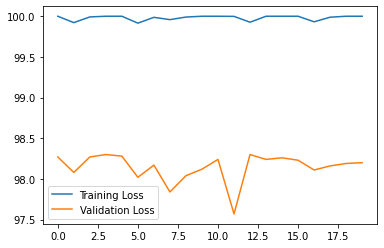

In [19]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
## YOUR CODE HERE ##
test_loss = 0.0
test_correct = 0.0
net.eval()
for inputs, labels in test_loader:
    # Pass to GPU if available.    
    inputs, labels = inputs.to(device), labels.to(device)
            
    outputs = net(inputs)
    loss = criterion(outputs, labels)
        
    _, preds = torch.max(outputs.data, 1)
    test_correct += torch.sum(preds == labels).item()
    test_loss += loss.item()
print(f'Epoch {epoch + 1} testing accuracy: {(test_correct/len(test_loader.dataset)) * 100:.2f}% testing loss: {test_loss/len(test_loader):.5f}')

Epoch 20 testing accuracy: 98.20% testing loss: 0.10939


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [23]:
## YOUR CODE HERE ##
torch.save

<function torch.serialization.save(obj, f: Union[str, os.PathLike, BinaryIO, IO[bytes]], pickle_module=<module 'pickle' from '/opt/conda/lib/python3.7/pickle.py'>, pickle_protocol=2, _use_new_zipfile_serialization=True) -> None>